In [ ]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten,Dropout
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
# download the dataset from source and divide into training and test set

from keras.datasets import mnist
(x_train, y_train),(x_test, y_test)=mnist.load_data()

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(y_train,10)
y_test= np_utils.to_categorical(y_test,10)


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3), padding='same',  filters=32))
model.add(MaxPooling2D(pool_size=(3,3),  padding='same'))

model.add(Conv2D( kernel_size=(3,3), padding='same',  filters=64))
model.add(MaxPooling2D(pool_size=(3,3),  padding='same'))

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.add(Dropout(0.2))
model.summary()

from tensorflow.keras.optimizers import SGD
opt=SGD()

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size = 128, epochs=20,validation_data=(x_test, y_test), verbose=1)

test_loss,test_acc=model.evaluate(x_test, y_test)
print("test accuracy: ",test_acc)

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1024)              0         
                                                                 
 dense_18 (Dense)            (None, 256)             

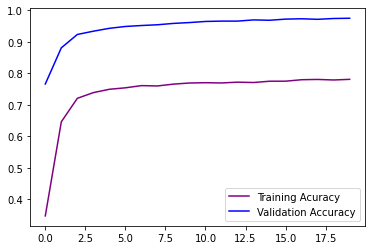

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(acc,color = 'purple',label = 'Training Acuracy')
plt.plot(val_acc,color = 'blue',label = 'Validation Accuracy')
plt.legend()

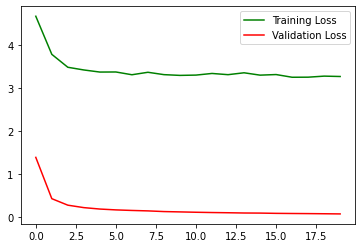

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.legend()

In [ ]:
#lưu lại mô hình 
model.save('CNN_Mnist_final.h5')
# lấy lại mô hình 
from keras import models
model500=models.load_model('CNN_Mnist_final.h5')

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

[[2.7773410e-07 2.5311766e-07 9.0967806e-06 ... 9.9991584e-01
  5.8112198e-07 2.8857643e-05]
 [3.2380052e-05 8.9097308e-04 9.9895042e-01 ... 6.0004268e-08
  5.2723230e-05 2.2015302e-08]
 [8.0954313e-05 9.9769431e-01 2.6038886e-04 ... 2.6337031e-04
  3.4667974e-04 4.3072447e-05]
 ...
 [1.3476463e-07 5.0276407e-07 1.9785491e-08 ... 9.5575751e-06
  8.3956598e-05 5.6844082e-04]
 [2.8293991e-06 3.9896901e-07 4.6194459e-06 ... 9.6507654e-07
  5.4842713e-03 1.7432127e-07]
 [1.6996006e-05 1.3282428e-07 1.4658977e-05 ... 5.1280208e-10
  5.1054626e-06 4.0872571e-08]]
